In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from cv2 import imread

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.datasets import 
from tensorflow.keras.applications import VGG16

In [4]:
def load_data(base, name, number, ext = 'jpg'):
    data = []
    counter = 0
    while len(data) < number:
        img = cv2.imread(f'{base}/{name}.{counter}.{ext}')
        if img is None:
            pass
        else:
            data.append(cv2.imread(f'{base}/{name}.{counter}.{ext}'))
        counter += 1
    return data

In [5]:
base = 'train_cats_dogs'

cats = load_data(base, 'cat', 2000)
dogs = load_data(base, 'dog', 2000)

In [6]:
def reshape_data(input_data, resolution):
    output_data = np.zeros(shape = (len(input_data), resolution[0], resolution[1], 3))
    for i, img in enumerate(input_data):
        output_data[i] = cv2.resize(src = input_data[i], dsize = resolution)
    return output_data

In [7]:
X_unshuffled = np.vstack((reshape_data(cats, (150, 150)), reshape_data(dogs, (150, 150)))) / 255
y_unshuffled = np.hstack((np.zeros(2000), np.ones(2000)))

(4000, 150, 150, 3)


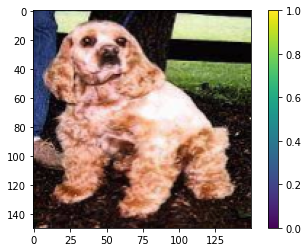

In [8]:
X_unshuffled_rgb = np.zeros(shape = X_unshuffled.shape)
X_unshuffled_rgb[:, :, :, 0] = X_unshuffled[:, :, :, 2]
X_unshuffled_rgb[:, :, :, 1] = X_unshuffled[:, :, :, 1]
X_unshuffled_rgb[:, :, :, 2] = X_unshuffled[:, :, :, 0]

print(X_unshuffled_rgb.shape)
plt.imshow(X_unshuffled_rgb[2039])
plt.colorbar()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_unshuffled, y_unshuffled, test_size = 1000, random_state = 0)
X_subtrain, X_valid, y_subtrain, y_valid = train_test_split(X_train, y_train, test_size = 1000, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_subtrain.shape, y_subtrain.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)
print(X_train[0])
print(y_train)

(3000, 150, 150, 3) (3000,)
(2000, 150, 150, 3) (2000,)
(1000, 150, 150, 3) (1000,)
(1000, 150, 150, 3) (1000,)
[[[0.41568627 0.49803922 0.50588235]
  [0.40392157 0.48627451 0.49411765]
  [0.40392157 0.48627451 0.49411765]
  ...
  [0.14117647 0.19215686 0.23137255]
  [0.12156863 0.17647059 0.22745098]
  [0.1372549  0.17647059 0.20392157]]

 [[0.41568627 0.49803922 0.50588235]
  [0.41960784 0.50196078 0.50980392]
  [0.42352941 0.50588235 0.51372549]
  ...
  [0.14901961 0.21176471 0.23921569]
  [0.12941176 0.19215686 0.21568627]
  [0.1372549  0.16862745 0.2       ]]

 [[0.41960784 0.51764706 0.52156863]
  [0.42352941 0.52156863 0.52941176]
  [0.41960784 0.51764706 0.5254902 ]
  ...
  [0.15686275 0.20784314 0.21568627]
  [0.08235294 0.12941176 0.14117647]
  [0.02352941 0.03529412 0.05098039]]

 ...

 [[0.49803922 0.58039216 0.66666667]
  [0.49411765 0.58823529 0.68235294]
  [0.48235294 0.59607843 0.69803922]
  ...
  [0.62745098 0.68235294 0.70980392]
  [0.59215686 0.6627451  0.70196078]
 

In [10]:
model = models.Sequential()

model.add(layers.Input(shape = (150, 150, 3)))
model.add(layers.Conv2D(16, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

print(model.summary())

model.add(layers.Conv2D(16, (3, 3), activation = 'relu'))
model.add(layers.Flatten(input_shape = (7, 7, 64)))
model.add(layers.Dense(528, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 16)        2

In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_subtrain, y_subtrain, epochs = 10, batch_size = 20, validation_data = (X_valid, y_valid))

Epoch 1/10
100/100 [==============================] - 12s 123ms/step - loss: 0.6938 - accuracy: 0.5110 - val_loss: 0.6942 - val_accuracy: 0.4940
Epoch 2/10
100/100 [==============================] - 11s 109ms/step - loss: 0.6881 - accuracy: 0.5415 - val_loss: 0.6645 - val_accuracy: 0.6130
Epoch 3/10
100/100 [==============================] - 12s 123ms/step - loss: 0.6754 - accuracy: 0.5755 - val_loss: 0.6386 - val_accuracy: 0.6370
Epoch 4/10
100/100 [==============================] - 19s 187ms/step - loss: 0.6460 - accuracy: 0.6295 - val_loss: 0.6169 - val_accuracy: 0.6610
Epoch 5/10
100/100 [==============================] - 21s 212ms/step - loss: 0.6262 - accuracy: 0.6415 - val_loss: 0.6109 - val_accuracy: 0.6720
Epoch 6/10
100/100 [==============================] - 17s 167ms/step - loss: 0.5908 - accuracy: 0.6885 - val_loss: 0.6260 - val_accuracy: 0.6580
Epoch 7/10
100/100 [==============================] - 14s 139ms/step - loss: 0.5757 - accuracy: 0.7015 - val_loss: 0.5886 - val_ac

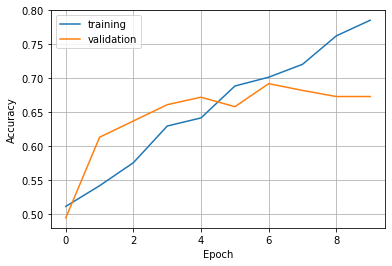

In [12]:
plt.plot(history.history['accuracy'], label = 'training')
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(); plt.grid()
plt.show()

In [13]:
history_2 = model.fit(X_subtrain, y_subtrain, epochs = 10, batch_size = 20, validation_data = (X_valid, y_valid))

Epoch 1/10
100/100 [==============================] - 14s 135ms/step - loss: 0.3943 - accuracy: 0.8235 - val_loss: 0.6420 - val_accuracy: 0.6770
Epoch 2/10
100/100 [==============================] - 14s 136ms/step - loss: 0.3411 - accuracy: 0.8380 - val_loss: 0.7007 - val_accuracy: 0.6760
Epoch 3/10
100/100 [==============================] - 17s 169ms/step - loss: 0.2841 - accuracy: 0.8795 - val_loss: 0.9007 - val_accuracy: 0.6700
Epoch 4/10
100/100 [==============================] - 15s 147ms/step - loss: 0.2339 - accuracy: 0.9065 - val_loss: 0.9284 - val_accuracy: 0.6630
Epoch 5/10
100/100 [==============================] - 13s 130ms/step - loss: 0.1574 - accuracy: 0.9365 - val_loss: 1.1202 - val_accuracy: 0.6560
Epoch 6/10
100/100 [==============================] - 13s 129ms/step - loss: 0.1404 - accuracy: 0.9505 - val_loss: 1.1860 - val_accuracy: 0.6610
Epoch 7/10
100/100 [==============================] - 15s 154ms/step - loss: 0.0860 - accuracy: 0.9750 - val_loss: 1.3824 - val_ac

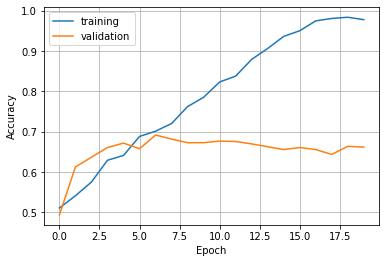

In [14]:
acc = np.hstack((history.history['accuracy'], history_2.history['accuracy']))
val_acc = np.hstack((history.history['val_accuracy'], history_2.history['val_accuracy']))

plt.plot(acc, label = 'training')
plt.plot(val_acc, label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(); plt.grid()
plt.show()

In [15]:
model.evaluate(X_test, y_test)
print()

32/32 [==============================] - 2s 62ms/step - loss: 1.6536 - accuracy: 0.6580



In [35]:
print('''
Currently, we have a max accuracy of 69%
''')


Currently, we have a max accuracy of 69%



In [17]:
def crop(img, tl = (0.25, 0.25), br = (0.75, 0.75), resize = True):
    size = img.shape[:2]
    x = img.shape[0]
    y = img.shape[1]
    
    cropped = img[int(tl[1] * x): int(br[1] * x), int(tl[0] * y): int(br[0] * y), :]
    
    if resize: 
        return cv2.resize(cropped, dsize = (y, x))
    else:
        return cropped

(374, 500, 3)
(374, 500, 3)


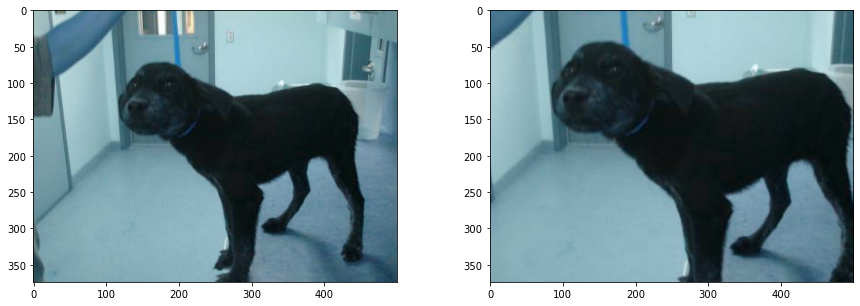

In [18]:
img = imread('train_cats_dogs/dog.42.jpg')

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].imshow(img)
print(img.shape)

cropped = crop(img, (0.1, 0.1), (1 - 0.1, 1 - 0.1))

ax[1].imshow(cropped)
print(cropped.shape)

In [19]:
print('''
Writing image transformation functions by hand is tough
I'm just gonna use the built in Keras package
''')


Writing image transformation functions by hand is tough
I'm just gonna use the built in Keras package



(374, 500, 3)
(1, 374, 500, 3)


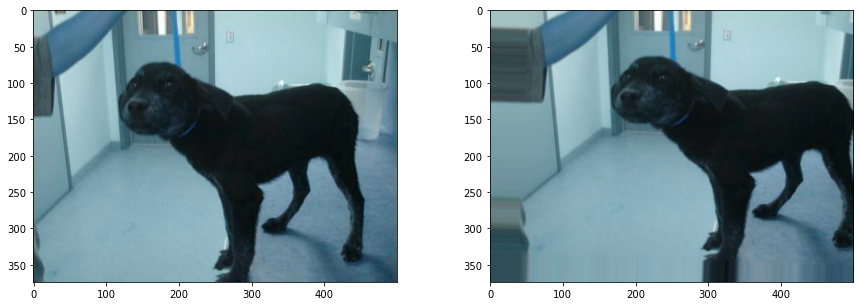

In [20]:
img = imread('train_cats_dogs/dog.42.jpg')

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].imshow(img)
print(img.shape)

mod = ImageDataGenerator(rotation_range = 10,
                        width_shift_range = 0.1,
                        height_shift_range = 0.1,
                        zoom_range = (0.9, 1.1))
img_tensor = img.reshape((1, *img.shape))
mod.fit(img_tensor)
img2, label = mod.flow(img_tensor, [0], batch_size = 1)[0]

ax[1].imshow(img2[0] / 255)
print(img2.shape)

In [21]:
gen = ImageDataGenerator(rotation_range = 10,
                        width_shift_range = 0.1,
                        height_shift_range = 0.1,
                        zoom_range = (0.9, 1.1))

gen.fit(X_subtrain)


gen.flow(X_subtrain, y_subtrain, batch_size = 1)[0]

(array([[[[0.52674574, 0.6004444 , 0.6117647 ],
          [0.50608456, 0.6041238 , 0.6119669 ],
          [0.51324123, 0.61128044, 0.6191236 ],
          ...,
          [0.554258  , 0.59928125, 0.6373297 ],
          [0.54895985, 0.5951605 , 0.6361523 ],
          [0.5443001 , 0.5921569 , 0.6356133 ]],
 
         [[0.5321259 , 0.6017562 , 0.6135209 ],
          [0.5088998 , 0.6034187 , 0.6117647 ],
          [0.5120332 , 0.61007243, 0.6179156 ],
          ...,
          [0.5318299 , 0.5921569 , 0.6406014 ],
          [0.5288865 , 0.5921569 , 0.64177877],
          [0.5259431 , 0.5921569 , 0.64295614]],
 
         [[0.54239386, 0.60840017, 0.6201649 ],
          [0.5125238 , 0.6028147 , 0.6117647 ],
          [0.5108252 , 0.6088644 , 0.61670756],
          ...,
          [0.51827985, 0.5945603 , 0.6479442 ],
          [0.51651376, 0.59514904, 0.6491216 ],
          [0.51474774, 0.5957377 , 0.65029895]],
 
         ...,
 
         [[0.831216  , 0.8739141 , 0.9002043 ],
          [0.83944

In [27]:
model2 = models.Sequential()

model2.add(layers.Input(shape = (150, 150, 3)))
# model2.add(layers.BatchNormalization()) # To normalize the inputs from 255 -> ~ 1
model2.add(layers.Conv2D(16, (3, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(16, (3, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(16, (3, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(16, (3, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D((2, 2)))

print(model2.summary())

model2.add(layers.Conv2D(16, (3, 3), activation = 'relu'))
model2.add(layers.Flatten(input_shape = (7, 7, 64)))
model2.add(layers.Dense(528, activation = 'relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))

print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 16)        2320      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 16)       

In [28]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history2 = model2.fit(gen.flow(X_subtrain, y_subtrain, batch_size = 20), 
                      epochs = 20, batch_size = 20, 
                      validation_data = (X_valid, y_valid))

Epoch 1/20
100/100 [==============================] - 13s 133ms/step - loss: 0.6924 - accuracy: 0.5255 - val_loss: 0.6893 - val_accuracy: 0.5060
Epoch 2/20
100/100 [==============================] - 14s 144ms/step - loss: 0.6711 - accuracy: 0.5840 - val_loss: 0.6596 - val_accuracy: 0.6180
Epoch 3/20
100/100 [==============================] - 14s 145ms/step - loss: 0.6519 - accuracy: 0.6185 - val_loss: 0.6427 - val_accuracy: 0.6220
Epoch 4/20
100/100 [==============================] - 13s 134ms/step - loss: 0.6457 - accuracy: 0.6220 - val_loss: 0.6329 - val_accuracy: 0.6460
Epoch 5/20
100/100 [==============================] - 18s 183ms/step - loss: 0.6247 - accuracy: 0.6550 - val_loss: 0.6192 - val_accuracy: 0.6610
Epoch 6/20
100/100 [==============================] - 22s 221ms/step - loss: 0.6176 - accuracy: 0.6580 - val_loss: 0.6154 - val_accuracy: 0.6600
Epoch 7/20
100/100 [==============================] - 17s 171ms/step - loss: 0.6085 - accuracy: 0.6715 - val_loss: 0.5931 - val_ac

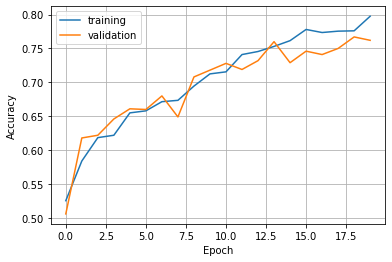

In [30]:
plt.plot(history2.history['accuracy'], label = 'training')
plt.plot(history2.history['val_accuracy'], label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(); plt.grid()
plt.show()

In [29]:
model3 = models.Sequential()

model3.add(layers.Input(shape = (150, 150, 3)))
model3.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model3.add(layers.MaxPooling2D((2, 2)))

print(model3.summary())

model3.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model3.add(layers.Flatten(input_shape = (7, 7, 32)))
model3.add(layers.Dense(528, activation = 'relu'))
model3.add(layers.Dense(1, activation = 'sigmoid'))

print(model3.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 32)       

In [31]:
model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history3 = model3.fit(gen.flow(X_subtrain, y_subtrain, batch_size = 20), 
                      epochs = 20, batch_size = 20, 
                      validation_data = (X_valid, y_valid))

Epoch 1/20
100/100 [==============================] - 27s 267ms/step - loss: 0.6946 - accuracy: 0.4935 - val_loss: 0.6927 - val_accuracy: 0.5990
Epoch 2/20
100/100 [==============================] - 27s 271ms/step - loss: 0.6936 - accuracy: 0.4935 - val_loss: 0.6929 - val_accuracy: 0.5910
Epoch 3/20
100/100 [==============================] - 23s 230ms/step - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6886 - val_accuracy: 0.5090
Epoch 4/20
100/100 [==============================] - 23s 232ms/step - loss: 0.6905 - accuracy: 0.5255 - val_loss: 0.6777 - val_accuracy: 0.5940
Epoch 5/20
100/100 [==============================] - 23s 229ms/step - loss: 0.6895 - accuracy: 0.5325 - val_loss: 0.6939 - val_accuracy: 0.5240
Epoch 6/20
100/100 [==============================] - 23s 235ms/step - loss: 0.6793 - accuracy: 0.5770 - val_loss: 0.6820 - val_accuracy: 0.5140
Epoch 7/20
100/100 [==============================] - 23s 232ms/step - loss: 0.6651 - accuracy: 0.6135 - val_loss: 0.6519 - val_ac

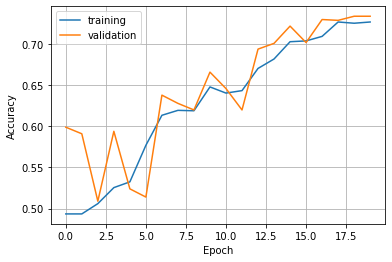

In [32]:
plt.plot(history3.history['accuracy'], label = 'training')
plt.plot(history3.history['val_accuracy'], label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(); plt.grid()
plt.show()

In [33]:
print('''
The extra channels from 16 -> 64 
did not make a significant difference
''')


The extra channels from 16 -> 64 
did not make a significant difference



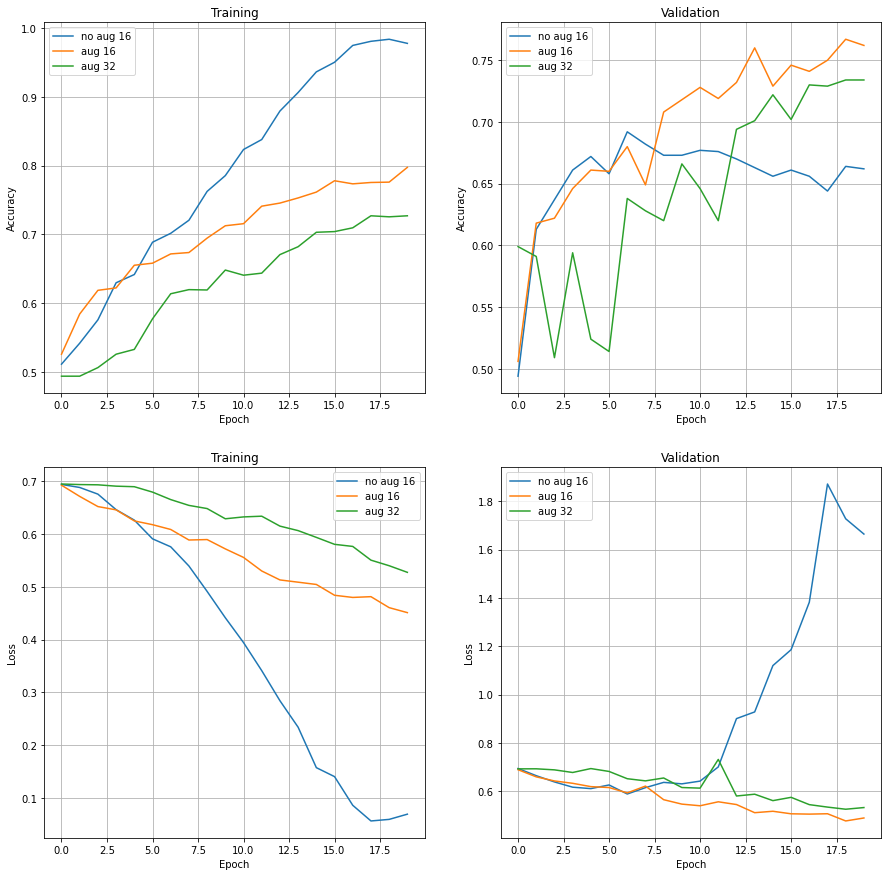

In [36]:
acc1 = np.hstack((history.history['accuracy'], history_2.history['accuracy']))
val_acc1 = np.hstack((history.history['val_accuracy'], history_2.history['val_accuracy']))
loss1 = np.hstack((history.history['loss'], history_2.history['loss']))
val_loss1 = np.hstack((history.history['val_loss'], history_2.history['val_loss']))

acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

fig, ax = plt.subplots(2, 2, figsize = (15, 15))

ax[0, 0].plot(acc1, label = 'no aug 16')
ax[0, 0].plot(acc2, label = 'aug 16')
ax[0, 0].plot(acc3, label = 'aug 32')
ax[0, 0].set_xlabel('Epoch')
ax[0, 0].set_ylabel('Accuracy')
ax[0, 0].set_title('Training')
ax[0, 0].legend(); ax[0, 0].grid()

ax[0, 1].plot(val_acc1, label = 'no aug 16')
ax[0, 1].plot(val_acc2, label = 'aug 16')
ax[0, 1].plot(val_acc3, label = 'aug 32')
ax[0, 1].set_xlabel('Epoch')
ax[0, 1].set_ylabel('Accuracy')
ax[0, 1].set_title('Validation')
ax[0, 1].legend(); ax[0, 1].grid()

ax[1, 0].plot(loss1, label = 'no aug 16')
ax[1, 0].plot(loss2, label = 'aug 16')
ax[1, 0].plot(loss3, label = 'aug 32')
ax[1, 0].set_xlabel('Epoch')
ax[1, 0].set_ylabel('Loss')
ax[1, 0].set_title('Training')
ax[1, 0].legend(); ax[1, 0].grid()

ax[1, 1].plot(val_loss1, label = 'no aug 16')
ax[1, 1].plot(val_loss2, label = 'aug 16')
ax[1, 1].plot(val_loss3, label = 'aug 32')
ax[1, 1].set_xlabel('Epoch')
ax[1, 1].set_ylabel('Loss')
ax[1, 1].set_title('Validation')
ax[1, 1].legend(); ax[1, 1].grid()

plt.show()

In [37]:
print('''
Suprisingly, aug 16 actuaclly did better than aug 32 ON ALL FRONTS
This is completely contraty to what I know about underfitting and overfitting
My best explanation is that it's per chance harder to optimize
''')


Suprisingly, aug 16 actuaclly did better than aug 32 ON ALL FRONTS
This is completely contraty to what I know about underfitting and overfitting
My best explanation is that it's per chance harder to optimize



In [40]:
conv_base = VGG16(include_top = False, weights = 'imagenet', input_shape = (150, 150, 3))

In [41]:
print(conv_base.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     